In [45]:
#!pip uninstall keras -y
# !pip uninstall keras-nightly -y
# !pip uninstall keras-Preprocessing -y
# !pip uninstall keras-vis -y
# !pip uninstall tensorflow -y

# !pip install tensorflow==2.3.0
# !pip install keras==2.4

In [46]:
# import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###  The data consists of monthly beer sales from the year January, 1992 to Novemeber, 2018

In [47]:
data = pd.read_csv("BeerWineLiquor.csv",index_col='date',parse_dates=True)# parse_dates+ True makes sure that there's a dat column too in time series data and this is not 
#just a normal string
data.index.freq = 'MS' # telling that we're dealing with monthly data. Pandas itself can recognize it but it's good to mention
data.head()

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [48]:
data.dtypes

beer    int64
dtype: object

In [49]:
data.shape

(324, 1)

In [50]:
data.isnull().sum()

beer    0
dtype: int64

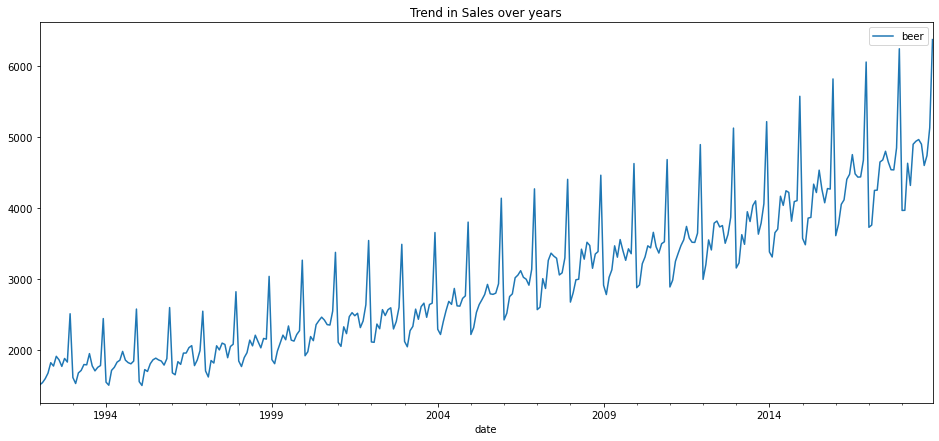

In [51]:
# Plotting graph for sales
data.plot(figsize=(16,7))
plt.title("Trend in Sales over years")
plt.show()

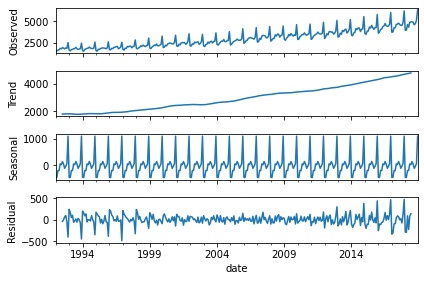

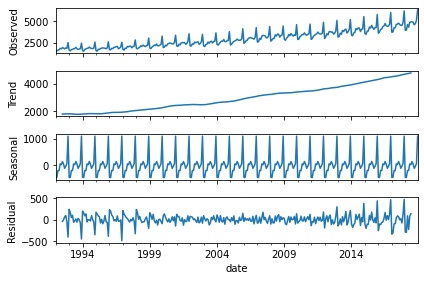

In [52]:
# Plotting various components of Time Series data
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
results=seasonal_decompose(data["beer"])
results.plot()

In [53]:
# Observed is the actual graph for sales over years
# Trend shows the kind of trend that is being followed
# seasonal shows seasonlaith by removing the trend from original graph
# residual shows noise in data

In [54]:
len(data)

324

In [55]:
train=data.iloc[:312]
test=data.iloc[312:]
# leaving last 12 months to test the data

In [56]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

In [57]:
sc.fit(train)
scaled_train = sc.transform(train)
scaled_test = sc.transform(test)
# Please note that we only fit the training data and we transform both train and test

In [58]:
scaled_test[:10]

array([[0.51983122],
       [0.52025316],
       [0.65991561],
       [0.59409283],
       [0.7164557 ],
       [0.72531646],
       [0.73037975],
       [0.71666667],
       [0.65337553],
       [0.68270042]])

In [59]:
#!pip install tensorflow==2.1
#!pip install keras==2.3.1

In [60]:
import keras
import tensorflow

In [61]:
# now, we have to create batches in such a way that we give it 12 months at a time and it predicts the 13th month and so on
# for this, we have TimeSeriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator
# defining the generator
n_input= 12 # we want to give 12 months at a time
n_features=1 # Since we have only one time series features it's 1. In case of multiple time series features, it'd be more
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [62]:
X,y=generator[0]
print("X is {}".format(X.flatten()))
print("y is {}".format(y))


X is [0.00168776 0.00843882 0.02025316 0.03670886 0.06772152 0.05780591
 0.08670886 0.07616034 0.05675105 0.08037975 0.06962025 0.21308017]
y is [[0.02383966]]


In [63]:
X.shape

(1, 12, 1)

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(generator,epochs=50)

Epoch 1/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0146
Epoch 2/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0083
Epoch 3/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 4/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0078
Epoch 5/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0072
Epoch 6/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 7/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 8/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 9/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 10/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 11/50
300/300 [==============================] - 1s 3ms/step - loss: 8.8066e-04
Epoch 12/50
300/300 [==============================] - 1s 3ms/step - loss: 6.5210e-04
Epoch 13/50
300/3

In [68]:
# Continue from here - plot loss and then predict values

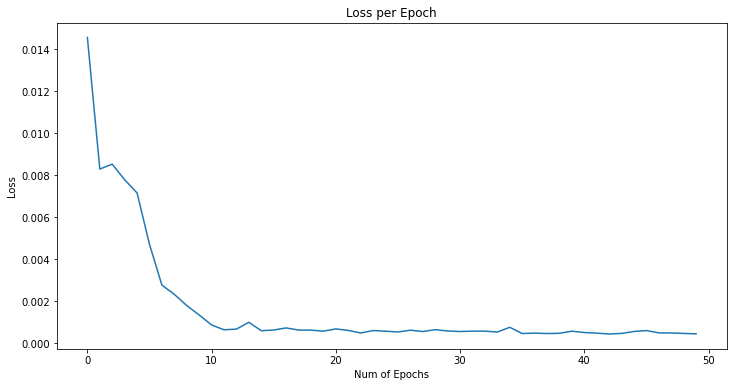

In [69]:
# we can plot loss per epoch too
loss_per_epoch = model.history.history['loss']
fig = plt.figure(1, figsize=(12,6))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title('Loss per Epoch')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.show()

In [70]:
X.shape

(1, 12, 1)

In [72]:
# So the shape of input is 1 row, 12 columns and last '1' depicts 1 feature
#Now, we have to predict the first value of test set so for that we'll pass last 12 rows of training data

test_predictions=[]
batch_for_prediction = scaled_train[-12:]
current_batch = batch_for_prediction.reshape(1,n_input,n_features) # first batch for prediction

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
 # updating the batch
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [73]:
test_predictions

[array([0.48799166], dtype=float32),
 array([0.505143], dtype=float32),
 array([0.6130529], dtype=float32),
 array([0.6211618], dtype=float32),
 array([0.7046334], dtype=float32),
 array([0.7137888], dtype=float32),
 array([0.74300164], dtype=float32),
 array([0.7105445], dtype=float32),
 array([0.6868359], dtype=float32),
 array([0.6866732], dtype=float32),
 array([0.7572293], dtype=float32),
 array([1.0790039], dtype=float32)]

In [74]:
scaled_test

array([[0.51983122],
       [0.52025316],
       [0.65991561],
       [0.59409283],
       [0.7164557 ],
       [0.72531646],
       [0.73037975],
       [0.71666667],
       [0.65337553],
       [0.68270042],
       [0.76561181],
       [1.02721519]])

In [75]:
actual_predictions = sc.inverse_transform(test_predictions)
actual_predictions

array([[3814.08047235],
       [3895.37775731],
       [4406.87076783],
       [4445.30701971],
       [4840.96238589],
       [4884.35894704],
       [5022.82777286],
       [4868.98105597],
       [4756.60209513],
       [4755.83108163],
       [5090.26701546],
       [6615.47862864]])

In [78]:
test.rename(columns={"beer":"BeerSalesActual"},inplace=True)

In [80]:
test["Predicted_Sales"]=actual_predictions

In [81]:
test

,BeerSalesActual,Predicted_Sales
date,,
2018-01-01,3965,3814.080472
2018-02-01,3967,3895.377757
2018-03-01,4629,4406.870768
2018-04-01,4317,4445.307020
2018-05-01,4897,4840.962386
2018-06-01,4939,4884.358947
2018-07-01,4963,5022.827773
2018-08-01,4898,4868.981056
2018-09-01,4598,4756.602095


Text(0.5, 1.0, 'Predicted versus actual sales')

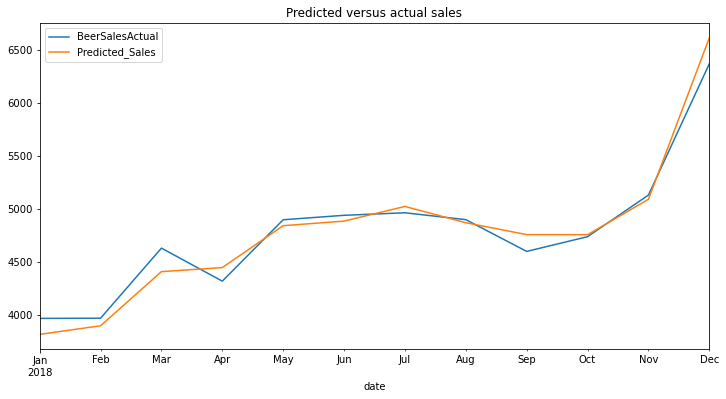

In [83]:
test.plot(figsize=(12,6))
figsize=(12,6)

In [89]:
# calculating rmse score
from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(test["BeerSalesActual"],test["Predicted_Sales"])))

126.3611089749965
